In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('train_housing.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [10]:
all_data_na = (train.isnull().sum() / len(train)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

,Missing Ratio
PoolQC,99.520548
MiscFeature,96.301370
Alley,93.767123
Fence,80.753425
FireplaceQu,47.260274
LotFrontage,17.739726
GarageYrBlt,5.547945
GarageType,5.547945
GarageFinish,5.547945
GarageQual,5.547945


Text(0.5,1,'Percent missing data by feature')

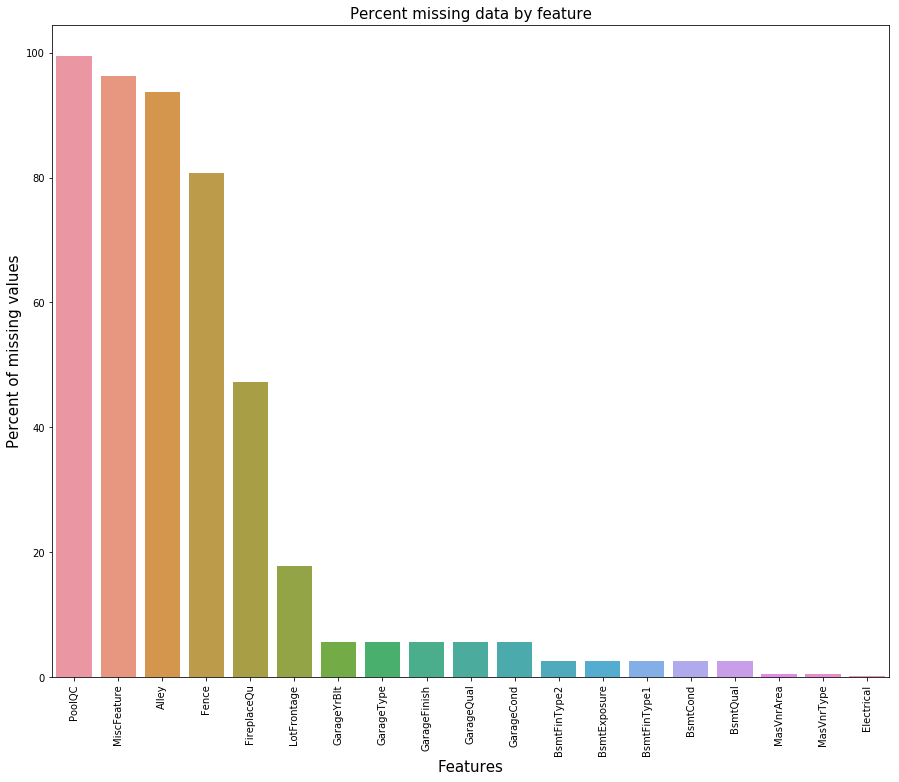

In [11]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

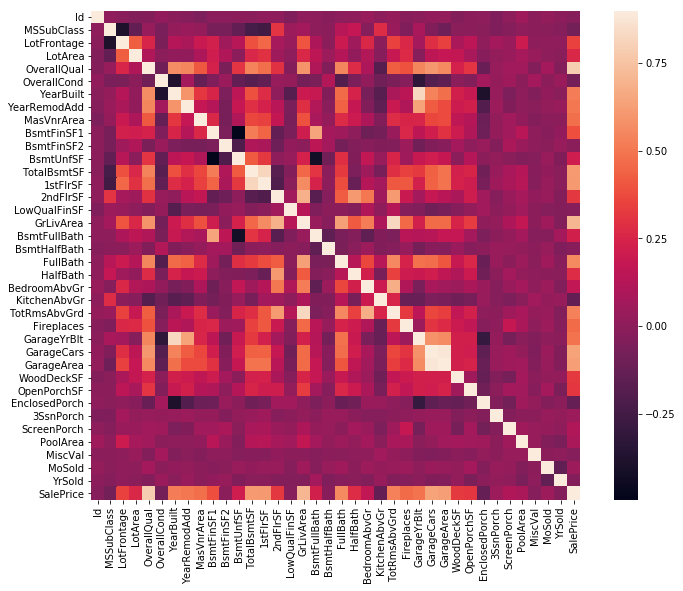

In [12]:
corrmat = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

## Replacing missing values

In [13]:
columns_to_nan = [
    "PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu",
    "MasVnrType",
    "MSSubClass",
    'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
    'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'
]

columns_to_zero = [
    'GarageYrBlt', 'GarageArea', 'GarageCars',
    'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath',
    "MasVnrArea",
]

In [14]:
train[columns_to_nan] = train[columns_to_nan].fillna("None")
train[columns_to_zero] = train[columns_to_zero].fillna(0)

train["LotFrontage"] = train.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

train['MSZoning'] = train['MSZoning'].fillna(train['MSZoning'].mode()[0])

train = train.drop(['Utilities'], axis=1)

train["Functional"] = train["Functional"].fillna("Typ")

train['Electrical'] = train['Electrical'].fillna(train['Electrical'].mode()[0])

train['KitchenQual'] = train['KitchenQual'].fillna(train['KitchenQual'].mode()[0])

train['Exterior1st'] = train['Exterior1st'].fillna(train['Exterior1st'].mode()[0])
train['Exterior2nd'] = train['Exterior2nd'].fillna(train['Exterior2nd'].mode()[0])

train['SaleType'] = train['SaleType'].fillna(train['SaleType'].mode()[0])

train['MSSubClass'] = train['MSSubClass'].fillna("None")

In [29]:
all_data_na = (train.isnull().sum() / len(train)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio


In [16]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,Inside,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,FR2,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,Inside,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,Corner,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,FR2,...,0,None,None,None,0,12,2008,WD,Normal,250000


## Feature processing

In [17]:
train['MSSubClass'] = train['MSSubClass'].apply(str)

#Year and month sold are transformed into categorical features.
train['YrSold'] = train['YrSold'].astype(str)
train['MoSold'] = train['MoSold'].astype(str)

In [18]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
label_encoders = {}
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(train[c].values))
    label_encoders[c] = lbl
    train[c] = lbl.transform(list(train[c].values))

# shape        
print('Shape all_data: {}'.format(train.shape))

Shape all_data: (1460, 80)


In [19]:
train = pd.get_dummies(train)

In [20]:
train.head()

,Id,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallQual,OverallCond,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,9,65.0,8450,1,1,3,0,7,4,...,0,0,0,1,0,0,0,0,1,0
1,2,4,80.0,9600,1,1,3,0,6,7,...,0,0,0,1,0,0,0,0,1,0
2,3,9,68.0,11250,1,1,0,0,7,4,...,0,0,0,1,0,0,0,0,1,0
3,4,10,60.0,9550,1,1,0,0,7,4,...,0,0,0,1,1,0,0,0,0,0
4,5,9,84.0,14260,1,1,0,0,8,4,...,0,0,0,1,0,0,0,0,1,0


## Linear regression

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split, KFold

In [33]:
X = train.drop(['Id', 'SalePrice'], axis=1)
y = train['SalePrice']

In [71]:
X_train, X_validation, Y_train, Y_validation = train_test_split(
    X,
    y,
    test_size = 0.2)

In [72]:
kfold = KFold(n_splits = 3)
cv_res = cross_val_score(LinearRegression(), X_train, Y_train, cv=kfold, scoring = 'neg_mean_squared_log_error')

In [76]:
print(cv_res, cv_res.mean(), cv_res.std())

[-0.0448066  -0.03841386 -0.05654752] -0.0465893260727591 0.007509593585538736


# PCA

In [36]:
from sklearn.decomposition import PCA

In [73]:
pca = PCA(n_components=150)
pca.fit(X_train)
X_train_tr = pca.transform(X_train)

In [74]:
cv_res2 = cross_val_score(LinearRegression(), X_train_tr, Y_train, cv=kfold, scoring = 'neg_mean_squared_log_error')

In [75]:
print(cv_res2, cv_res2.mean(), cv_res2.std())

[-0.03260238 -0.03211747 -0.03391978] -0.03287987639307361 0.0007615047361478748
